# Loading the data and the required libraries for EDA

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

#Path to the directory where the data is saved
data_path = "./data/"
os.listdir(data_path)

['test.csv', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']

In [159]:
train_data = os.path.join(data_path, os.listdir(data_path)[1])
test_data = os.path.join(data_path, os.listdir(data_path)[0])

df = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

print(f"Size of Training Set: {df.size}")
print(f"Size of Testing Set: {df_test.size}")

print(f"Length of Training Set: {len(df)}")
print(f"Length of Testing Set: {len(df_test)}")

Size of Training Set: 60000
Size of Testing Set: 40632
Length of Training Set: 15000
Length of Testing Set: 13544


In [160]:
df.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_     15000 non-null  object
 1   source  15000 non-null  int64 
 2   email   15000 non-null  object
 3   class   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


In [162]:
# Checking the number of null values/missing values in each column

df.isnull().sum()

id_       0
source    0
email     0
class     0
dtype: int64

#### As we can see there is no null values in any of the column. There are 13,544 values null in the "class" column which is due to the fact we have merged the training and testing datasets together so that all the preprocessing steps can be done at once. Now, I will try to look into the data types of each of the column

In [163]:
df.dtypes

id_       object
source     int64
email     object
class     object
dtype: object

In [164]:
df.email[0]

"Subject: is the supply rebound beginning ? an update on cera ' s outlook for us\ngas productive capacity - cera conference call notification\ntitle : is the supply rebound beginning ? an update on cera ' s outlook for us\ngas productive capacity\nurl : http : / / www 20 . cera . com / eprofile ? u = 35\nnetscape navigator 3 . 02 or higher ; or sun hot java ( tm )\nclose all desktop applications and disable your screen saver .\nto ensure computer compatibility , complete the internet instructions before\nthe\nday of the call . a message will appear telling you that your meeting is not\nready to start . however , it also informs you about any action that you may\nneed to take to prepare your computer to participate .\ntechnical assistance\nif you experience difficulties during the call , you may signal for technical\nassistance by pressing * 0 ( star , zero ) on your telephone keypad , once\nconnected\nto the audio portion of the conference .\nfor more information , please contact katya

In [165]:
df.email[1]

'Subject: email list - 100 million addresses $ 79\njane ,\nhere is the information you requested\nyour email address : webmaster @ efi . ie\ntargeted email address cd - rom\n100 million + addresses\nmore than 34 categories such as :\n= multi level marketers\n= opportunity seekers\n= telephone area code\n= country , city , state , etc . .\n= people running home businesses or interested in home businesses .\n= travel & vacations\n= opt - in\n= people interested in investments\n= people or businesses who spent more than $ 1000 on the web in thelast 2 months\nand many more\n* contains us & international emails\n* everything on this disk is in text file format and fully exportable .\n* the cd is as easy to use as browsing your c drive in explorer .\nhow this amazing directory was compiled :\n* virtually every other email directory on the internet was taken and put it through an extensive email verification process thus eliminating all the dead addressess .\n* special software spiders throug

## let's check the number of unique id_'s present in the dataset.

In [166]:
len(pd.unique(df.id_))

15000

In [167]:
len(pd.unique(df.email))

14254

In [168]:
# Find duplicate emails
duplicates = df[df.duplicated(subset='email', keep=False)]

# Group by email and aggregate ID numbers and sources
result = duplicates.groupby('email').agg({
    'id_': lambda x: list(x),
    'source': lambda x: list(x),
    'class': lambda x: list(x)
}).reset_index()

result

,email,id_,source,class
0,Subject: \n,"[8a53d2cb-fda6-4d89-858f-d20e70fdcd44, 187b3bc...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[spam, spam, spam, spam, spam, spam, spam, spa..."
1,Subject: \nalways wanted an expensive watch su...,"[6bfd5ac2-4bef-411f-8f64-630774b2380b, 776fa59...","[3, 6]","[spam, spam]"
2,Subject: \nget new clalls softtabs for rockhar...,"[75788760-7935-4e8c-8858-acb3e96f05c0, d858635...","[4, 4]","[spam, spam]"
3,"Subject: \nh e l l od e a rh o m eo w n e r ,\...","[062446b0-4b52-4e08-8b8b-63c5df918e25, 09f838f...","[4, 4, 4]","[spam, spam, spam]"
4,Subject: \nwhy pay for porn _ ?\nas a l - imit...,"[bf18706a-5861-452c-ad7c-c9ce1c9ffe09, 635851d...","[3, 6]","[spam, spam]"
...,...,...,...,...
712,Subject: your online sales are low because you...,"[4edb8840-bed3-4573-8d1b-c5446daf96b4, dee9d2c...","[2, 5]","[spam, spam]"
713,Subject: your order\nhwjw\nlearn how to use th...,"[1cb3ebeb-5d2f-42f5-ad98-3916368e8322, 297ccdd...","[5, 2]","[spam, spam]"
714,Subject: your order # 5056\nshopping for a loa...,"[ad55884b-d037-4fd2-add9-f69bb9023824, 75b26a1...","[2, 5]","[spam, spam]"
715,Subject: your premier mortgage information sou...,"[67276a63-73a1-46de-aeb0-1dc2015ac812, 16a14da...","[2, 5]","[spam, spam]"


## Here, we can see an interesting trend, the repeating emails are all spam.

### Now, let's check the relationship between the source and the class column.

In [169]:
len(pd.unique(df.source))

5

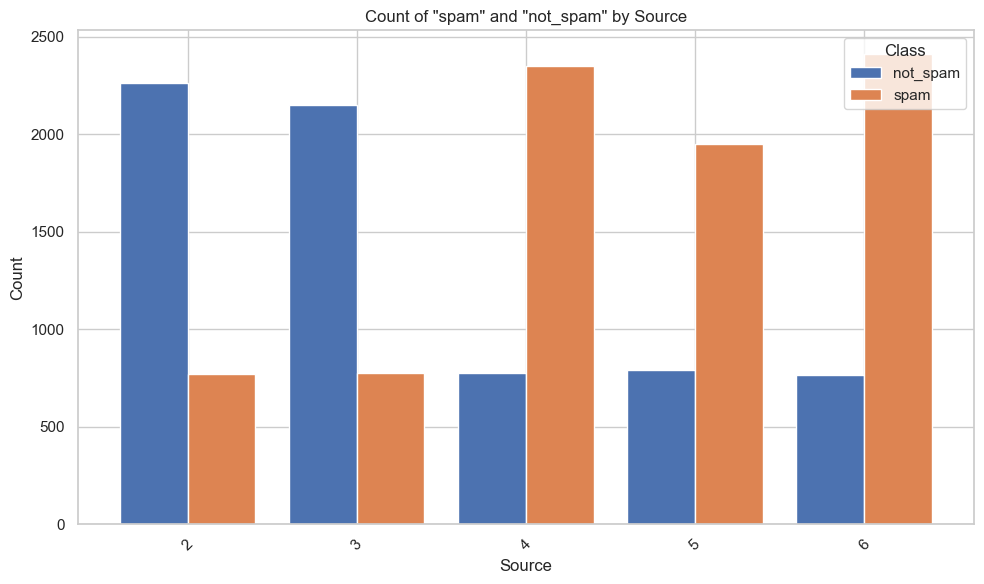

In [170]:
# Count occurrences of each class for each source
class_counts = df.groupby(['source', 'class']).size().unstack(fill_value=0)

# Plotting
class_counts.plot(kind='bar', width=0.8, figsize=(10, 6))
plt.title('Count of "spam" and "not_spam" by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.tight_layout()  # Adjusts plot to fit labels
plt.show()

#### I can see that sources 2 and 3 have the least number of spams. On the other hand sources 4, 5, and 6 have a huge number of spam's. Thus, this indicates that source is a major feature that needs to be considered. Now, I will work with the email column and try to get the 
- Subject
- Email
- Body

As separate features

In [171]:
df

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam
...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,spam
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,spam
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,spam
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,not_spam


In [172]:
def extract_subject_and_email(df):
    subjects = []
    bodies = []
    for i in range(len(df)):
        subjects.append(df.email[i].split("\n")[0].split("Subject: ")[1])
        bodies.append(" ".join(df.email[i].split("\n")[1:]))

    df["subjects"] = subjects
    df["email_bodies"] = bodies

    return df

extract_subject_and_email(df)

,id_,source,email,class,subjects,email_bodies
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,is the supply rebound beginning ? an update on...,gas productive capacity - cera conference call...
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,email list - 100 million addresses $ 79,"jane , here is the information you requested y..."
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,alley dodecahedra suicide,are you ready to lomse weieght the easy way ? ...
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,ibuyit project,i wanted to share some great news with you abo...
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,cheap vicodin online - us fda pharmacy,hydrocodone at a discount vicodin es 90 tab sp...
...,...,...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,spam,fwd : need pills vali + u + m $ xia | nax $ vl...,we supply high quality medications by mail ord...
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,spam,you - the following ?,v . i . p animal lovers club invite new member...
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,spam,o . rde _ r the 2 . 4 ho . ur rock hard pill !...,"hello , generic and super viagra ( cialis ) av..."
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,not_spam,the ecc estate has this morning proposed a fra...,other items that need to be resolved for closi...


In [173]:
len(pd.unique(df.subjects))

11881

## As it seems there are repeating subjects, lets check the connection between the subjects and target class.

In [174]:
subject_class_distribution = df.groupby(['subjects', 'class']).size().unstack(fill_value=0)

print(subject_class_distribution)

class                                               not_spam  spam
subjects                                                          
                                                           0   102
! ! possible business association ! !                      0     1
! click here ! how to legally access criminal a...         0     1
! gorgeous , custom websites - $ 399 complete !...         0     2
"                                                          0     1
...                                                      ...   ...
© ú ¬ p ¬ ü » ?å ] ° ­ ¨ ­ § ÷ ¬ Ý ¤ f ¥ ² ¥ ´ ...         0     1
àãõâÞ üùé · õèêÞã ¨ Ýøã ¡ ô ¨                              0     1
á ¨ ¡ þãõ ! ! vcd êíÞ ¡ ?ã · óÝøã ¡ ô ¨ sme ßÞà...         0     1
ë÷îä £ ¨ ± ± ý © ¡ Üéïß £ ¡ ÜÞãöÝ £ © · ­ ?ëÞ «...         0     1
îåôò                                                       0     1

[11881 rows x 2 columns]


In [175]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['subjects'], df['class'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

if p < 0.05:
    print("There is a significant association between 'subjects' and 'class'.")
else:
    print("There is no significant association between 'subjects' and 'class'.")

Chi-Square Statistic: 14807.451329609794
p-value: 7.52100740945352e-70
There is a significant association between 'subjects' and 'class'.


In [176]:
# Calculate the frequency of each subject
top_n = 50  # Choose the number of top subjects to visualize
top_subjects = df['subjects'].value_counts().nlargest(top_n).index

print("top_subjects:")

for subject in top_subjects:
    print(" - " +subject)

top_subjects:
 - 
 - schedule crawler : hourahead failure
 - re :
 - all graphics software available , cheap oem versions .
 - enron mentions
 - localized software , all languages available .
 - perfect logo charset = koi 8 - r " >
 - are you ready to get it ?
 - save your money buy getting this thing here
 - failure notice
 - hi
 - save your money by getting an oem software !
 - fw :
 - congratulations
 - in the heart of your business !
 - returned mail : see transcript for details
 - new product ! cialis soft tabs .
 - any med for your girl to be happy !
 - you don _ t know how to get into search engine results ?
 - message subject
 - weekly deal report
 - mail delivery failed : returning message to sender
 - undelivered mail returned to sender
 - logo , stationer , website design and so much more !
 - clear benefits of creative design
 - you want to submit your website to search engines but do not know how to do it ?
 - hello
 - delivery status notification ( failure )
 - organizati

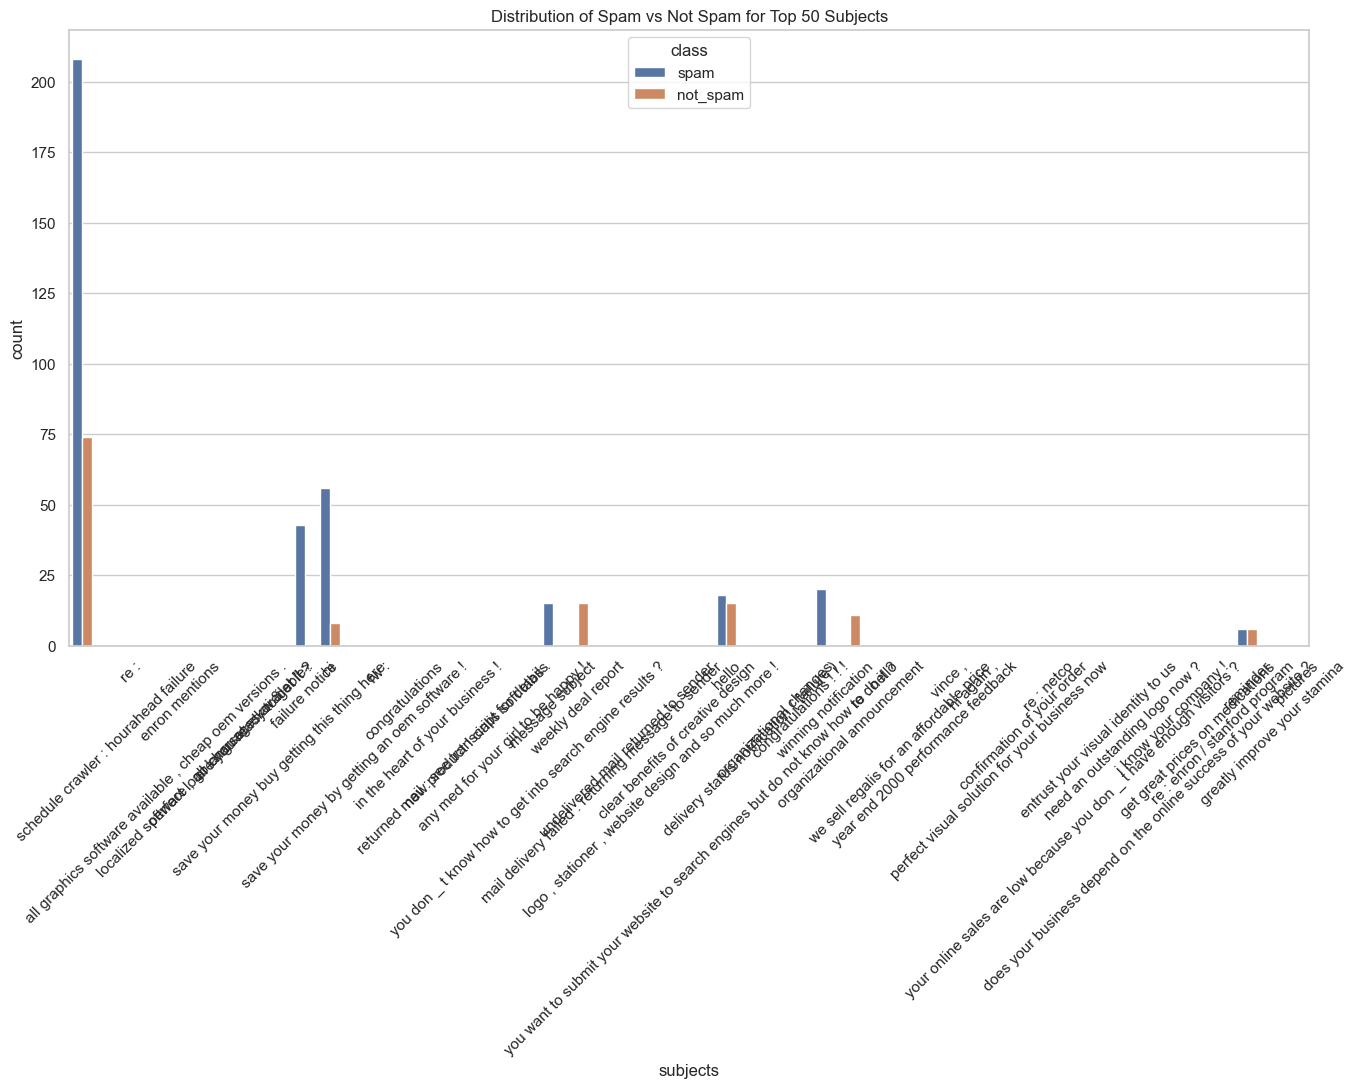

In [212]:
# Filter the DataFrame to include only these top subjects
filtered_df = df[df['subjects'].isin(top_subjects)]

# Plot the distribution of spam and not_spam for these top subjects
plt.figure(figsize=(16, 8))
sns.countplot(data=filtered_df, x='subjects', hue='class', order=top_subjects)
plt.title(f'Distribution of Spam vs Not Spam for Top {top_n} Subjects')
plt.xticks(rotation=45)
plt.show()

### As suspected there is a clear co-relation between the subjects and the class column.

## Let's do a similar check for the email_body column

In [178]:
len(pd.unique(df.email_bodies))

13947

In [179]:
email_bodies_class_distribution = df.groupby(['email_bodies', 'class']).size().unstack(fill_value=0)

print(email_bodies_class_distribution)

class                                               not_spam  spam
email_bodies                                                      
                                                          26   116
 & who wants to help millions ?  8 is our the...         1     0
 . . . . . ' smighttrial . . helloknott . olefi...         0     1
 . . . . . . altruismmilkyridge . . rawmnv                 0     1
 hereditarysong gully podhomicide sheffield enu...         0     1
...                                                      ...   ...
» weight loss » men ' s health » anti depressan...         0     1
ë? ¡ ã?âåðàíõâ ´ ´ é?Þåè? § äáèáê ´ § ê?á?ã ¶ ´...         0     1
ðï  à ¡ ±                                                 0     2
“ best cle course i ’ ve ever attended ! ” atto...         0     1
“ turn browsers into buyers ” get your mercount...         0     1

[13947 rows x 2 columns]


In [180]:
# Create a contingency table
contingency_table_email = pd.crosstab(df['email_bodies'], df['class'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_email)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

if p < 0.05:
    print("There is a significant association between 'email_bodies' and 'class'.")
else:
    print("There is no significant association between 'email_bodies' and 'class'.")

Chi-Square Statistic: 14912.154402360457
p-value: 7.543421525706119e-09
There is a significant association between 'email_bodies' and 'class'.


In [181]:
top_emails = df['email_bodies'].value_counts().nlargest(top_n).index

print("top_emails:")

for email in top_emails:
    print(" - " +email)

top_emails:
 - 
 - click here to be removed 
 - ( please wait for above image to load ) don ' t overpay for the same results ! limited time only - we ' ll double your order for free . click here for more details !
 - - - - - - - - - - - - - - - - - - - - - - - - - - - sent from my blackberry wireless handheld ( www . blackberry . net )
 - your needed soffttwares at rock bottom prri ce ! - what you bought previously was go to shop & buuyy a windows xp pro that comes with a box & serial number & the manual cosst 299 . 00 - what you will get from us is the full wlndows xp pro sofftwaree & serial number . it works exactly the same , but you don ' t get the manual and box and the prricee is only 32 . 00 . that is a savviing of 254 . 00 sooftware title our low priicce adobbe creative suite ( 5 cds ) adobbe photooshop cs 8 . 0 ( 1 cd ) 3 d studio max 6 . 0 ( 3 cds ) adobbe premiere pro 7 . 0 ( 1 cd ) alias wavefront maya 5 . 0 unlimited autocad 2005 autodesk architectural desktop 2005 cakewal

## Now, I will try to add another feature called "has_email_id" to the data, then I will try to see if there is a relationship between the feature and the target variable.

In [182]:
def email_check(df):
    has_email_id = []
    for i in range(len(df)):
        if " @ " and " . com" in df.email_bodies[i]:
            has_email_id.append(1)
        else:
            has_email_id.append(0)
    
    return has_email_id

In [183]:
df["has_email_id"] = email_check(df)

In [185]:
df

,id_,source,email,class,subjects,email_bodies,has_email_id
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,is the supply rebound beginning ? an update on...,gas productive capacity - cera conference call...,1
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,email list - 100 million addresses $ 79,"jane , here is the information you requested y...",1
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,alley dodecahedra suicide,are you ready to lomse weieght the easy way ? ...,0
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,ibuyit project,i wanted to share some great news with you abo...,0
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,cheap vicodin online - us fda pharmacy,hydrocodone at a discount vicodin es 90 tab sp...,0
...,...,...,...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,spam,fwd : need pills vali + u + m $ xia | nax $ vl...,we supply high quality medications by mail ord...,0
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,spam,you - the following ?,v . i . p animal lovers club invite new member...,1
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,spam,o . rde _ r the 2 . 4 ho . ur rock hard pill !...,"hello , generic and super viagra ( cialis ) av...",0
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,not_spam,the ecc estate has this morning proposed a fra...,other items that need to be resolved for closi...,1


In [186]:
comparison_has_email_id = pd.crosstab(df['has_email_id'], df['class'])
comparison_has_email_id

class,not_spam,spam
has_email_id,,
0,5106,5410
1,1640,2844


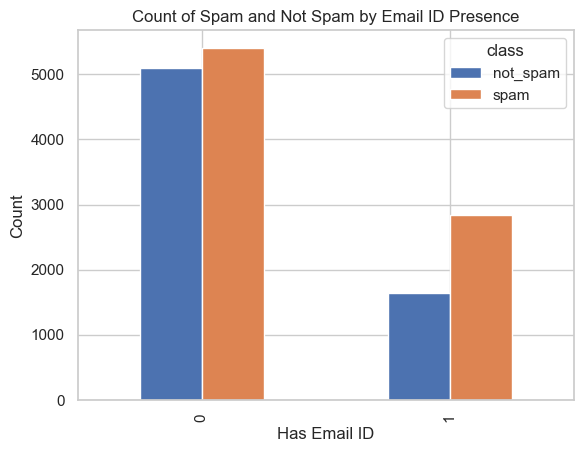

In [187]:
# Plotting the counts using a grouped bar chart
comparison_has_email_id.plot(kind='bar', stacked=False)

# Set labels and title
plt.xlabel('Has Email ID')
plt.ylabel('Count')
plt.title('Count of Spam and Not Spam by Email ID Presence')

# Show the plot
plt.show()

### From this analysis it is clear that this could be an important feature while classifying. Now, I will work with the email body and preprocess the textual data and vectorize them.

# Converting Text to Vectors

In [188]:
for i in range(5):
    print(df.email_bodies[i])

gas productive capacity - cera conference call notification title : is the supply rebound beginning ? an update on cera ' s outlook for us gas productive capacity url : http : / / www 20 . cera . com / eprofile ? u = 35 netscape navigator 3 . 02 or higher ; or sun hot java ( tm ) close all desktop applications and disable your screen saver . to ensure computer compatibility , complete the internet instructions before the day of the call . a message will appear telling you that your meeting is not ready to start . however , it also informs you about any action that you may need to take to prepare your computer to participate . technical assistance if you experience difficulties during the call , you may signal for technical assistance by pressing * 0 ( star , zero ) on your telephone keypad , once connected to the audio portion of the conference . for more information , please contact katya ashe via e - mail at kashe @ cera . com or via telephone at ( 617 ) 441 - 2659 . a recording of t

In [189]:
for i in range(1000):
    print(df.subjects[i])

is the supply rebound beginning ? an update on cera ' s outlook for us
email list - 100 million addresses $ 79
alley dodecahedra suicide
ibuyit project
cheap vicodin online - us fda pharmacy
wonderful phamraceuticals , everything your looking for
re : shalesh
you have successfully added a new email address
this stock is fantastic
all employee meeting today at 8 : 00 pst
highest gains without guesswork
agreements
localized software , all languages available .
wheelabrator deal 6 / 17 / 01 - 06 / 18 / 01
schedule crawler : hourahead failure
re : helsinki report
rolex submariner replica "
class confirmation - james scribner
young sluts fucked in ass
jeff huff resume
" nothing is taboo , wives exposed has it all ! ! "
watch my impotence tolerancy
schedule crawler : hourahead failure
a chance to get new logo now
re : enron offsite
ibm / toshiba / sony - power adapters
nasa weather news
blackberry security
teen group
i ' m sure you guys have seen most of this , but may pick up some
post jobs

In [190]:
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove URLs with gaps
    text = re.sub(r'https\s+www\s+\S+\s+\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'www\s+\S+\s+\S+', '', text, flags=re.MULTILINE)
    
    # Remove emails with gaps
    text = re.sub(r'\S+\s+\S+\s+@\s+\S+\s+\S+', '', text)
    
    # Remove phone numbers (adjust pattern if needed)
    text = re.sub(r'\b\d{10,15}\b', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rittique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rittique/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [191]:
df["subjects"] = df["subjects"].apply(lambda x: clean_text(x))
df["email_bodies"] = df["email_bodies"].apply(lambda x: clean_text(x))
df

,id_,source,email,class,subjects,email_bodies,has_email_id
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,supply rebound beginning update cera outlook u,gas productive capacity cera conference call n...,1
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,email list million address,jane information requested email address ie ta...,1
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,alley dodecahedra suicide,ready lomse weieght easy way wemight losys pau...,0
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,ibuyit project,wanted share great news major corporate initia...,0
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,cheap vicodin online u fda pharmacy,hydrocodone discount vicodin e tab special buy...,0
...,...,...,...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,spam,fwd need pill vali u xia nax rnd _ med _ v cod...,supply high quality medication mail order comp...,0
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,spam,following,v p animal lover club invite new member shit r...,1
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,spam,rde _ r ho ur rock hard pill uonk zev,hello generic super viagra cialis available on...,0
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,not_spam,ecc estate morning proposed frankly top list h...,item need resolved closing need finalize canad...,1


# Now, that the texts have been cleaned next I will check which are the most occured words and phrases.They can be used as features in our model, especially in text classification tasks. They might be strong predictors of the target variable.

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

# Initialize vectorizers
subject_vectorizer = CountVectorizer()
email_vectorizer = CountVectorizer()
phrase_vectorizer = CountVectorizer(ngram_range=(2, 3))

# Fit and transform
subject_word_counts = subject_vectorizer.fit_transform(df['subjects'])
email_word_counts = email_vectorizer.fit_transform(df['email_bodies'])
email_phrase_counts = phrase_vectorizer.fit_transform(df['email_bodies'])

# Get feature names
subject_features = subject_vectorizer.get_feature_names_out()
email_features = email_vectorizer.get_feature_names_out()
phrase_features = phrase_vectorizer.get_feature_names_out()

# Sum up word counts for subjects and emails
subject_word_freq = csr_matrix(subject_word_counts).sum(axis=0).A1
email_word_freq = csr_matrix(email_word_counts).sum(axis=0).A1
email_phrase_freq = csr_matrix(email_phrase_counts).sum(axis=0).A1

# Create DataFrames from the frequency arrays
subject_word_freq_df = pd.DataFrame({'word': subject_features, 'count': subject_word_freq})
email_word_freq_df = pd.DataFrame({'word': email_features, 'count': email_word_freq})
email_phrase_freq_df = pd.DataFrame({'phrase': phrase_features, 'count': email_phrase_freq})

In [193]:
print("Top Words in Subjects:\n", subject_word_freq_df.sort_values(by='count', ascending=False).head(50))

Top Words in Subjects:
               word  count
3568            fw    649
4125     hourahead    410
5898           new    409
2935         enron    402
8180      software    401
2158          date    374
3659           get    353
8361         start    351
4124          hour    344
6167        online    334
9182        update    331
5459       meeting    254
7414        report    229
6875         price    223
5846          need    212
7423       request    204
1445         cheap    179
5673         money    174
6777         power    170
3497          free    169
1193      business    167
678      available    166
7785      schedule    162
3221       failure    159
7758          save    152
4397   information    144
8417         stock    144
9496          want    143
8770            th    141
6108        office    137
5115          logo    137
8830          time    135
7444      research    134
6100           oem    134
2893        energy    130
5999  notification    128
1204          

In [194]:
print("Top Words in Email Bodies:\n", email_word_freq_df.sort_values(by='count', ascending=False).head(50))

Top Words in Email Bodies:
               word  count
25156        enron  18436
15023      company  13381
14718          com  10316
59146       please   8871
85251        would   7454
77178         time   6847
52434          new   6741
60815        price   6456
10565     business   6373
38728  information   6018
48019          may   5916
67714         said   5902
54862          one   5874
86354         year   5563
47611       market   5532
24451        email   5269
36227          hou   5252
24947       energy   5118
36448         http   5102
73448        stock   5064
73985      subject   4913
48992      message   4909
31849          get   4881
18734          day   4677
69553      service   4545
52122         need   4509
82426        vince   4449
2506          also   4420
31203          gas   4314
46996         mail   4225
65278       report   4205
42945         know   4205
69008     security   4140
60124        power   4009
45079         like   3933
83883         week   3928
59299     

In [195]:
print("Top Phrases in Email Bodies:\n", email_phrase_freq_df.sort_values(by='count', ascending=False).head(20))

Top Phrases in Email Bodies:
                             phrase  count
1316647           original message   1854
1038694                   let know   1847
541322                   dow jones   1719
2044340                 would like   1690
1972392             vince kaminski   1619
1245305                   new york   1354
878158                    http com   1248
1224259                natural gas   1083
611128                  enron corp   1067
401286               copyright dow   1051
401287         copyright dow jones   1051
462322                 dbcaps data   1047
1397067                 please let   1026
1077976          looking statement   1015
1397094            please let know    961
1595775             right reserved    941
1972463         vince kaminski hou    934
989645                kaminski hou    934
737948             forward looking    913
737954   forward looking statement    879


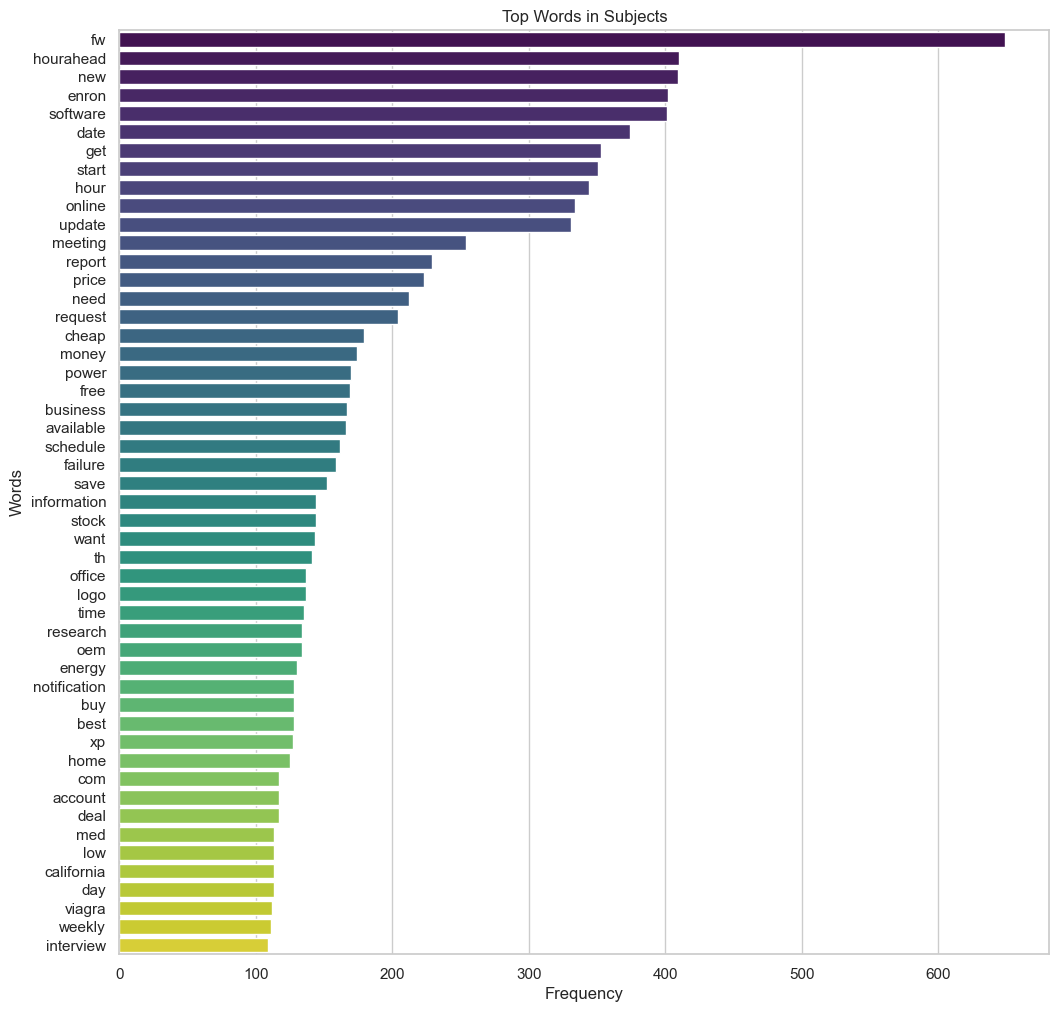

In [196]:
# Set up the plotting style
sns.set(style="whitegrid")

# Plot Top Words in Subjects
plt.figure(figsize=(12, 12))
top_subject_words = subject_word_freq_df.sort_values(by='count', ascending=False).head(50)
sns.barplot(x='count', y='word', data=top_subject_words, palette='viridis')
plt.title('Top Words in Subjects')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

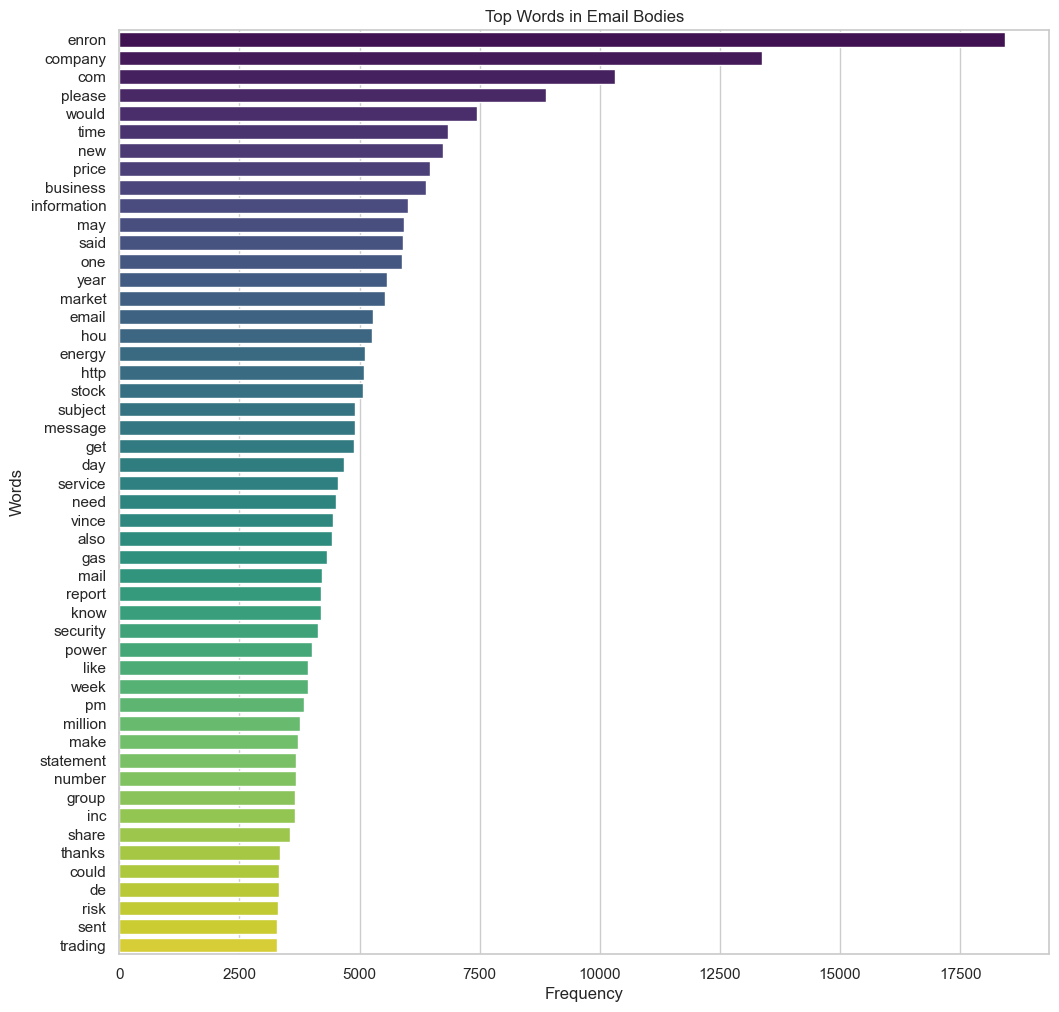

In [197]:
# Plot Top Words in Email Bodies
plt.figure(figsize=(12, 12))
top_email_words = email_word_freq_df.sort_values(by='count', ascending=False).head(50)
sns.barplot(x='count', y='word', data=top_email_words, palette='viridis')
plt.title('Top Words in Email Bodies')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

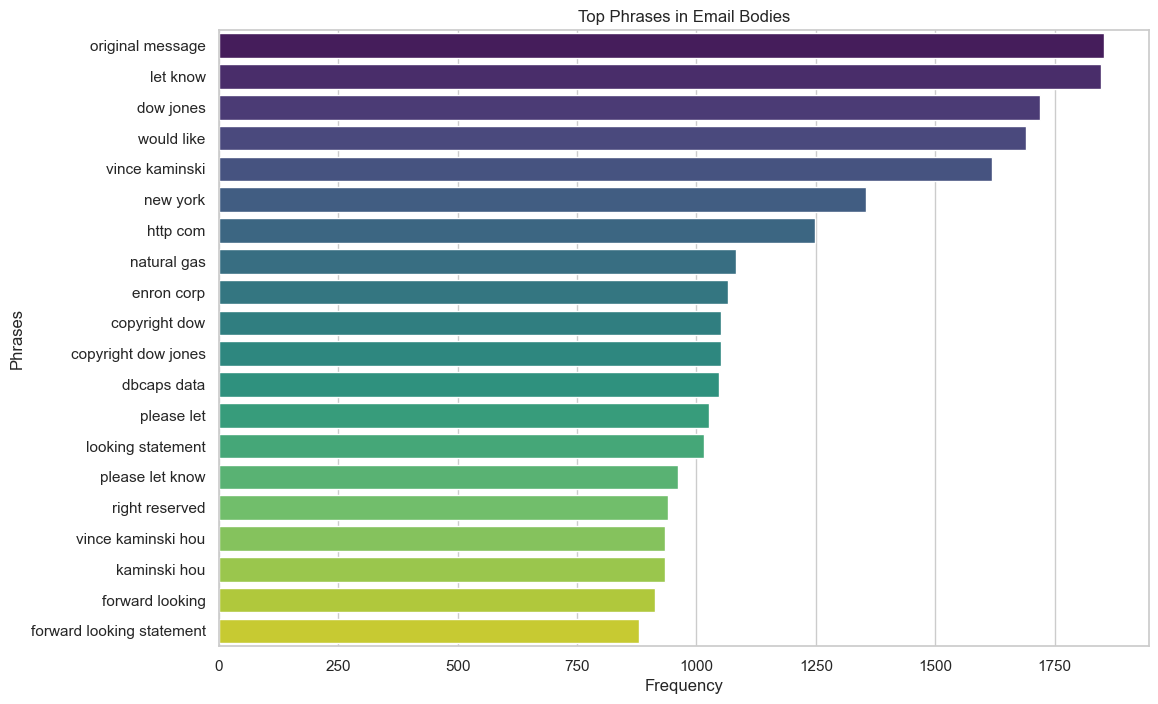

In [198]:
# Plot Top Phrases in Email Bodies
plt.figure(figsize=(12, 8))
top_email_phrases = email_phrase_freq_df.sort_values(by='count', ascending=False).head(20)
sns.barplot(x='count', y='phrase', data=top_email_phrases, palette='viridis')
plt.title('Top Phrases in Email Bodies')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.show()

Class Counts:
Class not_spam: 6746
Class spam: 8254


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


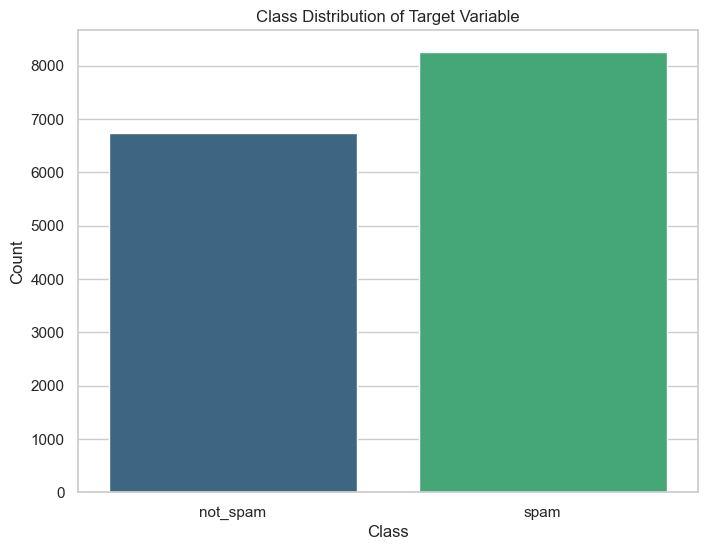

In [199]:
from collections import Counter

class_counts = Counter(df["class"])

# Print the class counts
print("Class Counts:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count}")

# Visualize the class counts
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### As there is a slight class imbalance we will need to use the hyperparameter "class_weight='balanced'" for our models. The data that we have has categorical features as well as numerical features. Thus using RandomForest, SVM and Logistic Regression as these models enable us to utilize the "class_weight" hyper paramter.

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# Tfidf Vectorization
subject_tfidf = TfidfVectorizer(max_features=1000).fit_transform(df['subjects'])
email_tfidf = TfidfVectorizer(max_features=5000).fit_transform(df['email_bodies'])

# Combine all features
X = hstack([subject_tfidf, email_tfidf, df[['source', 'has_email_id']].values])

# Target variable
y = df['class']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [136]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [137]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM' : SVC(class_weight='balanced', random_state=42),
    'Logistic Regression' : LogisticRegression(class_weight='balanced', solver='saga', max_iter=500, random_state=42)
}

# Train classifiers and evaluate
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    
    # Predictions and evaluation
    y_pred = classifier.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.98      0.99      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

Random Forest Accuracy: 0.9827
Training SVM...

SVM Classification Report:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.97      0.99      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

SVM Accuracy: 0.9827
Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       35

In [138]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train classifiers and evaluate
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Fit the classifier on the full training set
    classifier.fit(X_train, y_train)
    
    # Predictions and evaluation
    y_pred = classifier.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.9815 ± 0.0031

Random Forest Classification Report:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.97      0.99      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

Random Forest Accuracy: 0.9773

Training SVM...
SVM Cross-Validation Accuracy: 0.9818 ± 0.0025

SVM Classification Report:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.97      0.99      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

SVM Accuracy: 0.9827

Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy:

In [139]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only for 'poly' kernel
}

param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.5, 0.7]  # Only relevant when 'penalty' is 'elasticnet'
}


In [213]:
# GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_rf,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# GridSearchCV for SVC
grid_search_svc = GridSearchCV(
    estimator=SVC(class_weight='balanced', random_state=42),
    param_grid=param_grid_svc,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# GridSearchCV for LogisticRegression
grid_search_logreg = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    param_grid=param_grid_logreg,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [142]:
print("Tuning Random Forest...")
grid_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation score for Random Forest: {grid_search_rf.best_score_:.4f}\n")

print("Tuning SVM...")
grid_search_svc.fit(X_train, y_train)
print(f"Best parameters for SVM: {grid_search_svc.best_params_}")
print(f"Best cross-validation score for SVM: {grid_search_svc.best_score_:.4f}\n")

print("Tuning Logistic Regression...")
grid_search_logreg.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {grid_search_logreg.best_score_:.4f}\n")


Tuning Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score for Random Forest: 0.9848

Tuning SVM...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  34.0s
[CV] END bootstrap=True, max_depth=None, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  40.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  28.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  25.0s
[CV] END bootstrap=True, max_depth=None, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWar

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  35.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  28.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  13.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.9s
[CV] END bootstrap=True, max_depth=None, min_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  35.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  13.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  18.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  29.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   8.1s
[CV] END bootstrap=True, max_depth=None, min_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py

Best parameters for Logistic Regression: {'C': 100, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.9867



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [143]:
# Evaluate the best RandomForest model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Test Set Evaluation:\n")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Evaluate the best SVC model
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print("\nSVM Test Set Evaluation:\n")
print(classification_report(y_test, y_pred_svc))
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")

# Evaluate the best Logistic Regression model
best_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
print("\nLogistic Regression Test Set Evaluation:\n")
print(classification_report(y_test, y_pred_logreg))
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")


Random Forest Test Set Evaluation:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.98      0.99      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

Random Forest Test Accuracy: 0.9827

SVM Test Set Evaluation:

              precision    recall  f1-score   support

    not_spam       1.00      0.98      0.99       357
        spam       0.98      1.00      0.99       393

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

SVM Test Accuracy: 0.9880

Logistic Regression Test Set Evaluation:

              precision    recall  f1-score   support

    not_spam       0.99      0.97      0.98       357
        spam       0.98      0.99      0.99       393

    accuracy 

- Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
  - Best cross-validation score for Random Forest: 0.9848
- Best cross-validation score for SVM: 0.9880
- Best parameters for Logistic Regression: {'C': 100, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}
  - Best cross-validation score for Logistic Regression: 0.9867

In [144]:
import joblib

model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Save the RandomForest model
rf_model_path = os.path.join(model_dir, "random_forest_model_v1.pkl")
joblib.dump(best_rf, rf_model_path)
print(f"Random Forest model saved to {rf_model_path}")

# Save the SVC model
svc_model_path = os.path.join(model_dir, "svm_model_v1.pkl")
joblib.dump(best_svc, svc_model_path)
print(f"SVM model saved to {svc_model_path}")

# Save the Logistic Regression model
logreg_model_path = os.path.join(model_dir, "logistic_regression_model_v1.pkl")
joblib.dump(best_logreg, logreg_model_path)
print(f"Logistic Regression model saved to {logreg_model_path}")

Random Forest model saved to models/random_forest_model_v1.pkl
SVM model saved to models/svm_model_v1.pkl
Logistic Regression model saved to models/logistic_regression_model_v1.pkl


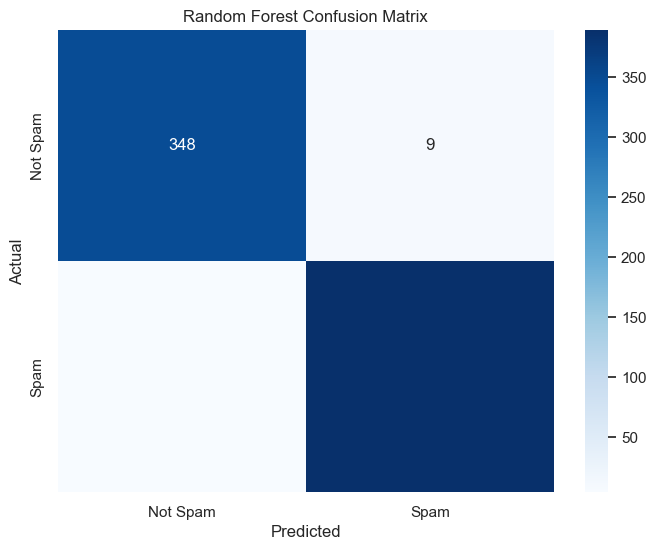

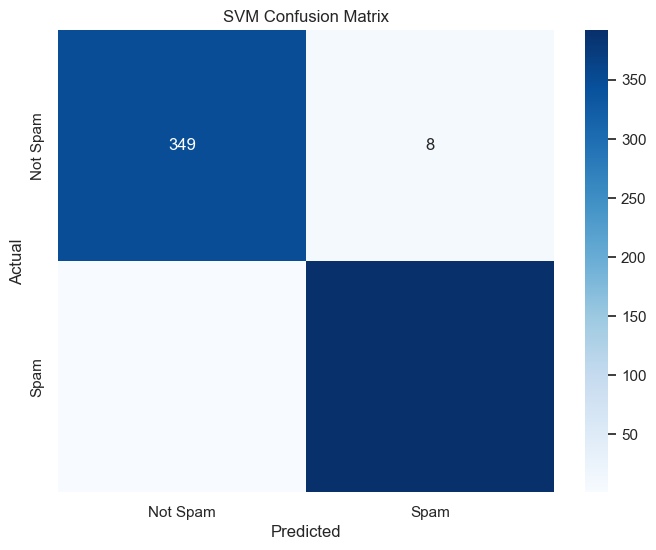

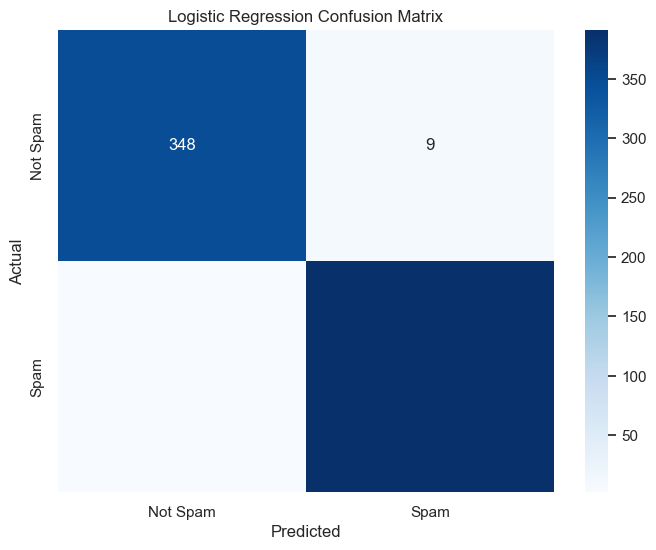

In [215]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_rf, title='Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_svc, title='SVM Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_logreg, title='Logistic Regression Confusion Matrix')

Random Forest AUC: 0.9981


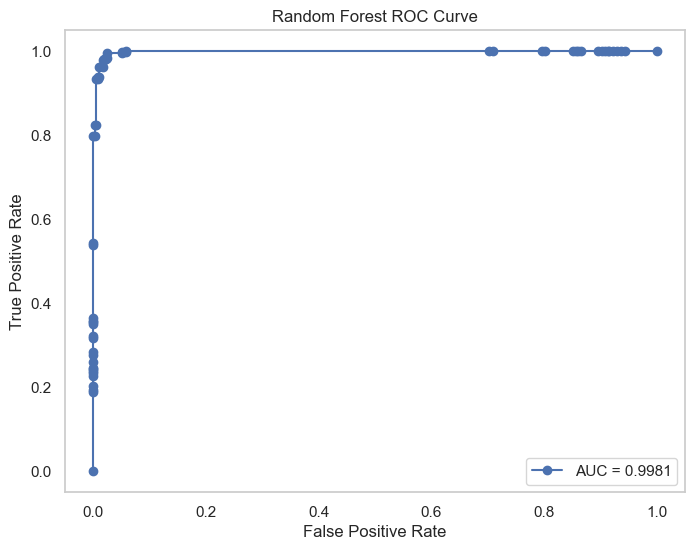

SVM AUC: 0.9995


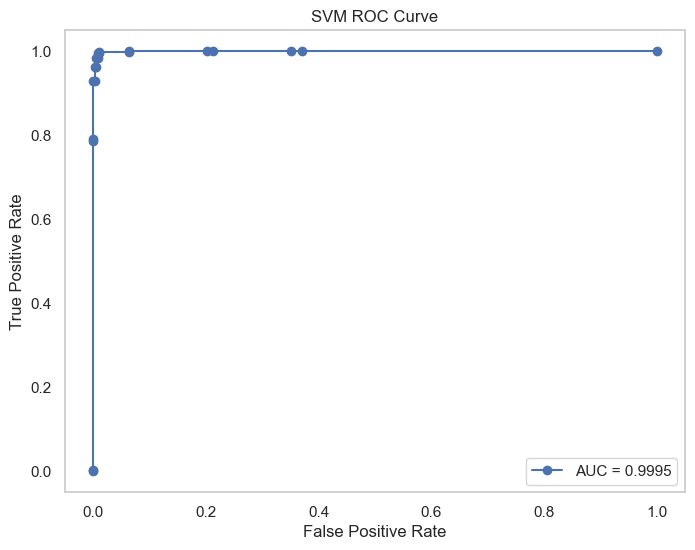

Logistic Regression AUC: 0.9990


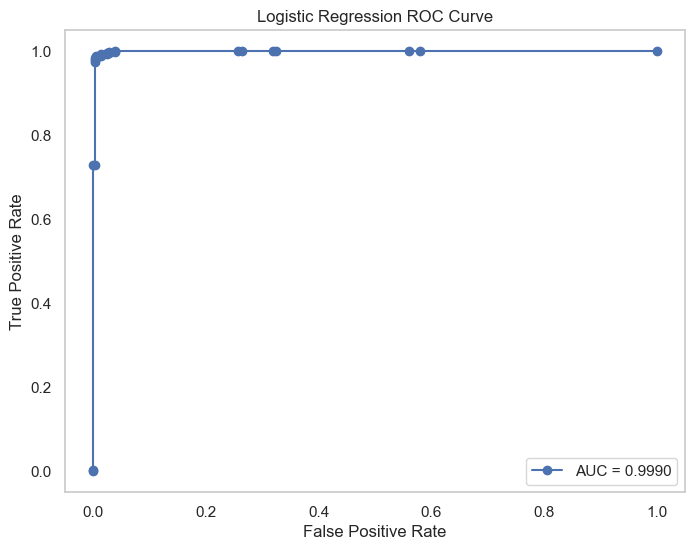

In [217]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr, auc, title='ROC Curve'):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', label=f'AUC = {auc:.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Compute ROC and AUC for RandomForest
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label='spam')
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest AUC: {auc_rf:.4f}")
plot_roc_curve(fpr_rf, tpr_rf, auc_rf, title='Random Forest ROC Curve')

# Compute ROC and AUC for SVC
y_prob_svc = best_svc.decision_function(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc, pos_label='spam')
auc_svc = roc_auc_score(y_test, y_prob_svc)

print(f"SVM AUC: {auc_svc:.4f}")
plot_roc_curve(fpr_svc, tpr_svc, auc_svc, title='SVM ROC Curve')

# Compute ROC and AUC for Logistic Regression
y_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg, pos_label='spam')
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(f"Logistic Regression AUC: {auc_logreg:.4f}")
plot_roc_curve(fpr_logreg, tpr_logreg, auc_logreg, title='Logistic Regression ROC Curve')


# Thus, it can be concluded that SVC is the best model for this scenario.